# Library&Package Import

In [1]:
import pandas as pd
import numpy as np

## Export the dataset:

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,100217,1995,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,100220,1474,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,100755,4862,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,100880,1915,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,100887,22831,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,9601,1097,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,9601,2067,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,9602,1686,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,9606,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## Normalization:

In [3]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['DNAtype'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.00000000e+00, 1.00000000e+00, 2.15340051e-01, ...,
        5.55309735e-02, 1.95236236e-02, 0.00000000e+00],
       [7.71545405e-05, 1.00000000e+00, 2.15346497e-01, ...,
        5.99557522e-02, 2.65521281e-02, 0.00000000e+00],
       [1.54309081e-04, 1.00000000e+00, 2.16496152e-01, ...,
        8.65044248e-02, 0.00000000e+00, 1.34957826e-02],
       ...,
       [9.99845691e-01, 5.00000000e-01, 2.06185789e-02, ...,
        7.87610619e-02, 4.64662241e-02, 1.89034677e-01],
       [9.99922845e-01, 5.00000000e-01, 2.06271744e-02, ...,
        2.19026549e-02, 3.08473253e-02, 1.46204311e-02],
       [1.00000000e+00, 5.00000000e-01, 2.06271744e-02, ...,
        3.45132743e-02, 4.45138618e-02, 2.02530459e-01]])

## Data split:

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 68) (2593, 68) (10369,) (2593,)


## Model training:

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_LSTM = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test)) 


Epoch 1/15
325/325 [==============================] - 1s 1ms/step - loss: 0.6768 - accuracy: 0.7171 - val_loss: 0.5529 - val_accuracy: 0.7798
Epoch 2/15
325/325 [==============================] - 0s 929us/step - loss: 0.4595 - accuracy: 0.8625 - val_loss: 0.3974 - val_accuracy: 0.8966
Epoch 3/15
325/325 [==============================] - 0s 927us/step - loss: 0.3413 - accuracy: 0.9079 - val_loss: 0.3107 - val_accuracy: 0.9082
Epoch 4/15
325/325 [==============================] - 0s 909us/step - loss: 0.2745 - accuracy: 0.9163 - val_loss: 0.2583 - val_accuracy: 0.9148
Epoch 5/15
325/325 [==============================] - 0s 899us/step - loss: 0.2324 - accuracy: 0.9201 - val_loss: 0.2232 - val_accuracy: 0.9190
Epoch 6/15
325/325 [==============================] - 0s 909us/step - loss: 0.2031 - accuracy: 0.9220 - val_loss: 0.1970 - val_accuracy: 0.9217
Epoch 7/15
325/325 [==============================] - 0s 923us/step - loss: 0.1807 - accuracy: 0.9282 - val_loss: 0.1774 - val_accuracy: 0

In [6]:
y_pred = model.predict(x_test)
y_pred1 = np.zeros(y_pred.shape[0])
for index, value in enumerate(y_pred):
    y_pred1[index] = np.argmax(y_pred[index])

82/82 [==============================] - 0s 600us/step


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='micro')
recall = recall_score(y_test, y_pred1, average='micro')
f1 = f1_score(y_test, y_pred1, average='micro')

print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_micro_score: ',f1)
print('accuracy_score: ',accuracy)

precision_score:  0.973004242190513
recall_score:  0.973004242190513
f1_micro_score:  0.973004242190513
accuracy_score:  0.973004242190513


Text(0.5, 1.0, 'Training and Validation Loss')

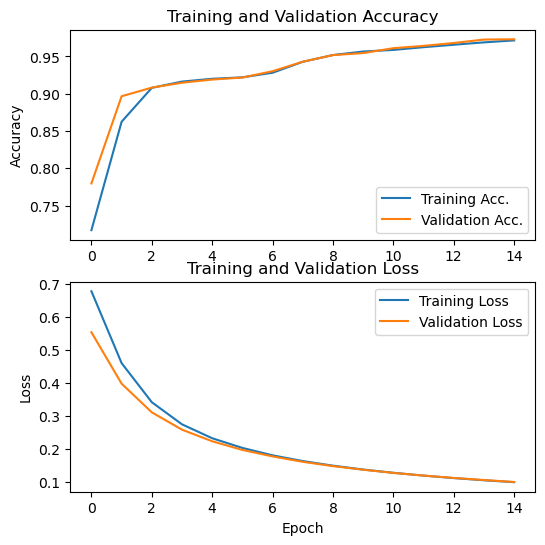

In [8]:
import matplotlib.pyplot as plt
acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']

loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Acc.')
plt.plot(val_acc, label='Validation Acc.')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[1839    3    1]
 [  11  559   11]
 [  42    2  125]]

Classification report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1843
           1       0.99      0.96      0.98       581
           2       0.91      0.74      0.82       169

    accuracy                           0.97      2593
   macro avg       0.96      0.90      0.93      2593
weighted avg       0.97      0.97      0.97      2593



## Optimized Model:

In [10]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),  
  tf.keras.layers.Dense(3, activation='softmax')
])


model1.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history_LSTM1 = model1.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test)) 


Epoch 1/15
325/325 [==============================] - 1s 1ms/step - loss: 0.1786 - accuracy: 0.9449 - val_loss: 0.0428 - val_accuracy: 0.9900
Epoch 2/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0257 - val_accuracy: 0.9919
Epoch 3/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 4/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0193 - val_accuracy: 0.9946
Epoch 5/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0181 - val_accuracy: 0.9938
Epoch 6/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0270 - val_accuracy: 0.9927
Epoch 7/15
325/325 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0187 - val_accuracy: 0.9946
Epoch 

In [11]:
y_pred = model1.predict(x_test)
y_pred1 = np.zeros(y_pred.shape[0])
for index, value in enumerate(y_pred):
    y_pred1[index] = np.argmax(y_pred[index])

82/82 [==============================] - 0s 582us/step


In [12]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='micro')
recall = recall_score(y_test, y_pred1, average='micro')
f1 = f1_score(y_test, y_pred1, average='micro')

print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_micro_score: ',f1)
print('accuracy_score: ',accuracy)

precision_score:  0.9930582337061319
recall_score:  0.9930582337061319
f1_micro_score:  0.9930582337061319
accuracy_score:  0.9930582337061319


Text(0.5, 1.0, 'Training and Validation Loss')

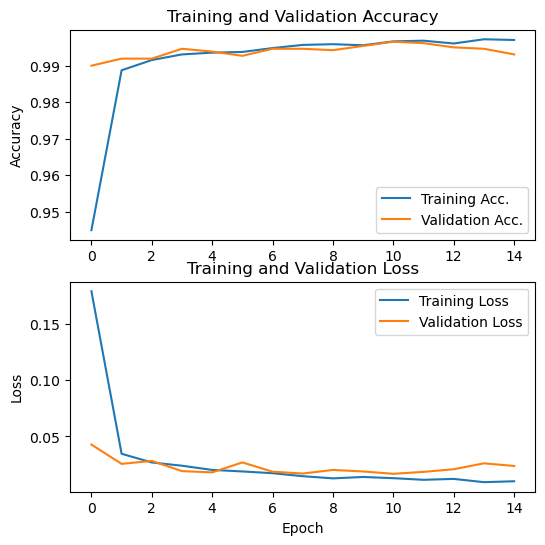

In [13]:
acc = history_LSTM1.history['accuracy']
val_acc = history_LSTM1.history['val_accuracy']

loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Acc.')
plt.plot(val_acc, label='Validation Acc.')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[1830    3   10]
 [   1  577    3]
 [   0    1  168]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1843
           1       0.99      0.99      0.99       581
           2       0.93      0.99      0.96       169

    accuracy                           0.99      2593
   macro avg       0.97      0.99      0.98      2593
weighted avg       0.99      0.99      0.99      2593

